## **Hurricane Florence data: https://www.datacamp.com/community/tutorials/geospatial-data-python**

In [28]:
import geopandas 
import numpy as np
import pandas as pd
from shapely.geometry import Point
import mapclassify
import missingno as msn

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#### **source for json file: https://eric.clst.org/tech/usgeojson/**

In [2]:
# Getting to know GEOJSON file:
country = geopandas.read_file("data/gz_2010_us_040_00_5m.json")
country.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."


In [3]:
# checking the type of the dataframe
type(country)

geopandas.geodataframe.GeoDataFrame

In [4]:
#Checking the data type of the column containing coordinates: it's GeoSeries.
type(country.geometry)

geopandas.geoseries.GeoSeries

### **Each value in the GeoSeries is a Shapely Object. It can be:**
   * **Point -> for building**
   * **Line -> for street**
   * **Polygon -> for city**
   * **MultiPolygon -> for country with multiple cities inside**


### **For more information about each Geometric object, read this article: https://shapely.readthedocs.io/en/stable/manual.html#geometric-objects**

In [5]:
type(country.geometry[0])

shapely.geometry.multipolygon.MultiPolygon

<AxesSubplot:>

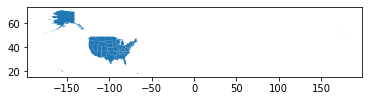

In [6]:
country.plot()

#### **The US map is relatively small compared to the frame. It's because the information includes Alaska, Hawaii and Puerto Rico, which spread out around. For this tutorial purpose, you can exclude Alaska and Hawaii as the hurricane did not go anywhere near those two states. You can also add the figure size and color to customize your own plot:**

# Exclude Alaska and Hawaii for now
country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(figsize=(30,20), color='#3B3C6E');


In [7]:
# Load in hurricane data:
florence = pd.read_csv('data/florence.csv')
florence.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,08/30/2018 11:00,12.9,18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 10:45,Avila
1,1A,08/30/2018 14:00,12.9,19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 13:36,Avila
2,2,08/30/2018 17:00,12.9,19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 16:36,Avila
3,2A,08/30/2018 20:00,13.1,20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 19:44,Beven
4,3,08/30/2018 23:00,13.2,20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 22:42,Beven


#### **Exploratory Data Analysis:**

* **Checking the information, data type**
* **Any missing value**
* **Statistical data**



In [8]:
florence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AdvisoryNumber  105 non-null    object 
 1   Date            105 non-null    object 
 2   Lat             105 non-null    float64
 3   Long            105 non-null    float64
 4   Wind            105 non-null    int64  
 5   Pres            105 non-null    int64  
 6   Movement        105 non-null    object 
 7   Type            105 non-null    object 
 8   Name            105 non-null    object 
 9   Received        105 non-null    object 
 10  Forecaster      104 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 9.1+ KB


#### **Checking missing values using the missingno package. This is a useful package using visualization to show missing data. As you can see below, there's only one missing value in the column "Forecaster" which you don't need for this tutorial. So you can ignore it for now.**

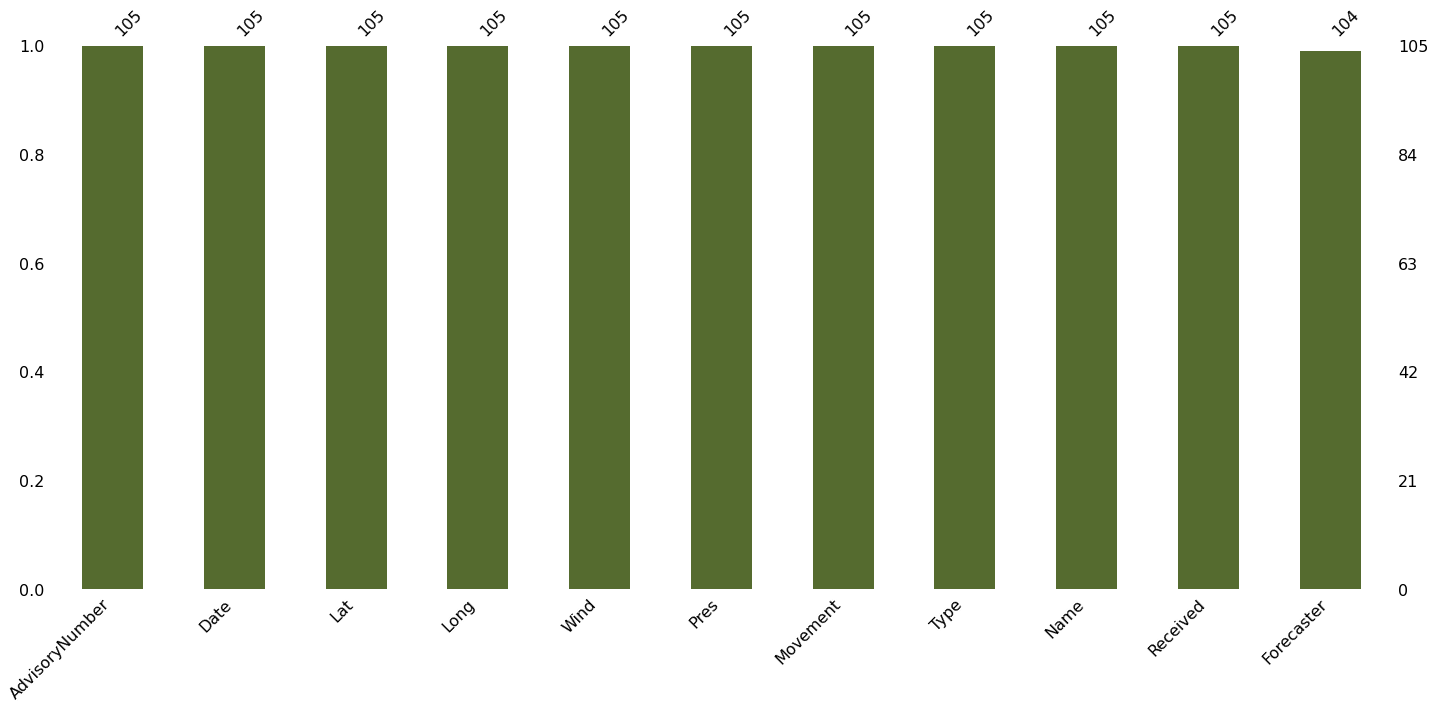

In [9]:
# Notice you can always adjust the color of the visualization
msn.bar(florence, color='darkolivegreen');

In [10]:
# Take a look at some statistical information, some could be very useful such as mean wind speed, maximum and minimum wind speed of this hurricane, etc.

# Statistical information
florence.describe()

,Lat,Long,Wind,Pres
count,105.000000,105.000000,105.000000,105.000000
mean,25.931429,56.938095,74.428571,981.571429
std,7.975917,20.878865,36.560765,22.780667
min,12.900000,18.400000,25.000000,939.000000
25%,18.900000,41.000000,40.000000,956.000000
50%,25.100000,60.000000,70.000000,989.000000
75%,33.600000,76.400000,105.000000,1002.000000
max,42.600000,82.900000,140.000000,1008.000000


In [11]:
# dropping all unused features:
florence = florence.drop(['AdvisoryNumber', 'Forecaster', 'Received'], axis=1)
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name
0,08/30/2018 11:00,12.9,18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six
1,08/30/2018 14:00,12.9,19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six
2,08/30/2018 17:00,12.9,19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six
3,08/30/2018 20:00,13.1,20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six
4,08/30/2018 23:00,13.2,20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six


#### **Normally, if you plot the data by itself, there is no need to take extra care for the coordinate. However, if you want it to look similar to how you look on the map, it's important to check on the longitude and latitude. Here the longitude is west, you will need to add "-" in front of the number to correctly plot the data:**

In [12]:
# Add "-" in front of the number to correctly plot the data:
florence['Long'] = 0 - florence['Long']
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name
0,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six
1,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six
2,08/30/2018 17:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six
3,08/30/2018 20:00,13.1,-20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six
4,08/30/2018 23:00,13.2,-20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six


#### **Then you can combine Lattitude and Longitude to create hurricane coordinates, which will subsequently be turned into GeoPoint for visualization purpose.**

In [13]:
# Combining Lattitude and Longitude to create hurricane coordinates:
florence['coordinates'] = florence[['Long', 'Lat']].values.tolist()
florence.head()


,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,"[-18.4, 12.9]"
1,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,"[-19.0, 12.9]"
2,08/30/2018 17:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,"[-19.4, 12.9]"
3,08/30/2018 20:00,13.1,-20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,"[-20.4, 13.1]"
4,08/30/2018 23:00,13.2,-20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,"[-20.9, 13.2]"


In [14]:
# Change the coordinates to a geoPoint
florence['coordinates'] = florence['coordinates'].apply(Point)
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-18.4 12.9)
1,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19 12.9)
2,08/30/2018 17:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19.4 12.9)
3,08/30/2018 20:00,13.1,-20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.4 13.1)
4,08/30/2018 23:00,13.2,-20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.9 13.2)


In [15]:
type(florence)

pandas.core.frame.DataFrame

In [16]:
type(florence['coordinates'])

pandas.core.series.Series

#### **After converting the data into geospatial data, we will check the type of florence dataframe and column coordinates of Florence data again. Now it's Geo DataFrame and GeoSeries.**

In [17]:
# Convert the count df to geodf
florence = geopandas.GeoDataFrame(florence, geometry='coordinates')
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-18.40000 12.90000)
1,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19.00000 12.90000)
2,08/30/2018 17:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19.40000 12.90000)
3,08/30/2018 20:00,13.1,-20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.40000 13.10000)
4,08/30/2018 23:00,13.2,-20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.90000 13.20000)


In [18]:
type(florence)

geopandas.geodataframe.GeoDataFrame

In [19]:
type(florence['coordinates'])

geopandas.geoseries.GeoSeries

In [20]:
# Filtering from before the hurricane was named.
florence[florence['Name']=='Six']

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-18.40000 12.90000)
1,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19.00000 12.90000)
2,08/30/2018 17:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19.40000 12.90000)
3,08/30/2018 20:00,13.1,-20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.40000 13.10000)
4,08/30/2018 23:00,13.2,-20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.90000 13.20000)
5,08/31/2018 02:00,13.4,-21.2,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-21.20000 13.40000)
6,08/31/2018 05:00,13.6,-21.4,35,1006,WNW at 12 MPH (285 deg),Potential Tropical Cyclone,Six,POINT (-21.40000 13.60000)
7,08/31/2018 08:00,13.7,-21.8,35,1006,WNW at 12 MPH (285 deg),Potential Tropical Cyclone,Six,POINT (-21.80000 13.70000)
8,08/31/2018 11:00,13.7,-22.7,35,1006,WNW at 13 MPH (285 deg),Potential Tropical Cyclone,Six,POINT (-22.70000 13.70000)
9,08/31/2018 14:00,13.8,-23.3,35,1006,WNW at 13 MPH (285 deg),Potential Tropical Cyclone,Six,POINT (-23.30000 13.80000)


In [21]:
# Groupping by name to see how many names it has in the data set:
florence.groupby('Name').Type.count()

Name
FLORENCE     6
Florence    85
SIX          4
Six         10
Name: Type, dtype: int64

In [22]:
print("Mean wind speed of Hurricane Florence is {} mph and it can go up to {} mph maximum".format(round(florence.Wind.mean(),4),
                                                                                         florence.Wind.max()))

Mean wind speed of Hurricane Florence is 74.4286 mph and it can go up to 140 mph maximum


#### **So the average wind speed of hurricane Florence is 74.43 miles per hour (119.78 km per hour) and the maximum is 140 miles per hour (225.308 km per hour). To imagine how scary this wind speed is, the website Beaufort Wind Scale, developed by U.K Royal Navy, shows the appearance of wind effects on the water and on land. With the speed of 48 to 55 miles per hours, it can already break and uproot trees, and cause "considerable structural damage".**

## **Visualization**

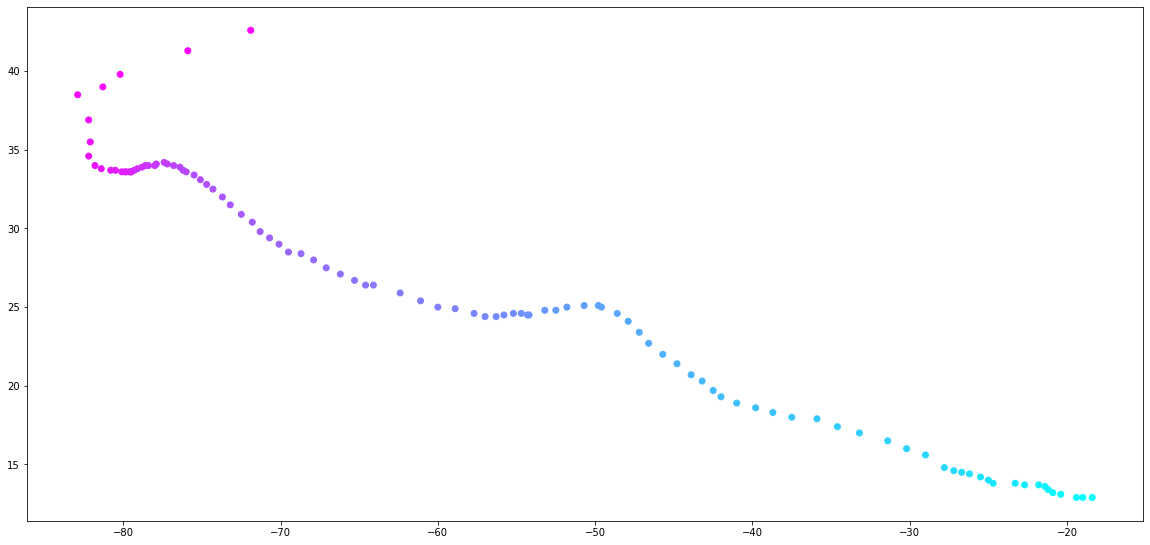

In [61]:
florence.plot(figsize=(20,10), cmap='cool', legend=True, label="Wind speed(mph)", scheme='quantiles');

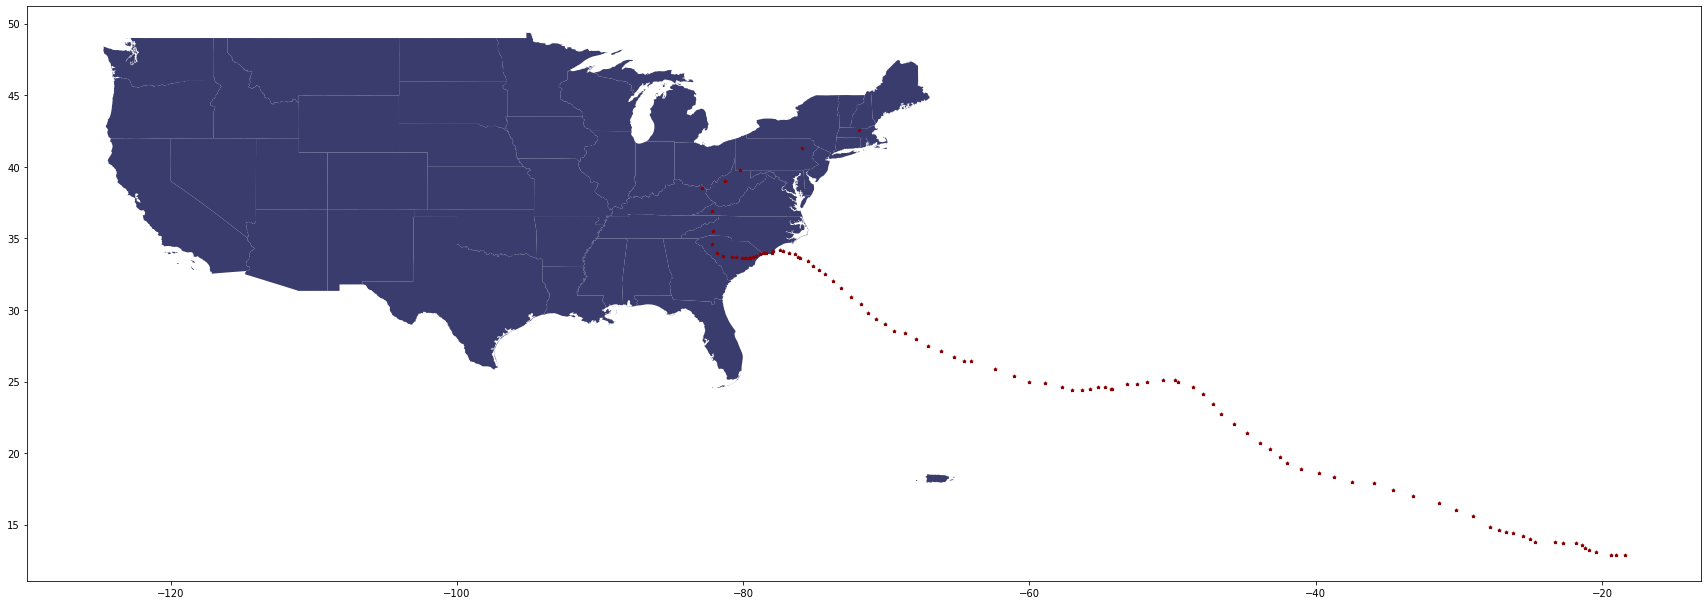

In [24]:
# Plotting to see the hurricane overlay the US map:
fig, ax = plt.subplots(1, figsize=(30,20))
base = country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(ax=ax, color='#3B3C6E')

# plotting the hurricane position on top with red color to stand out:
florence.plot(ax=base, color='darkred', marker="*", markersize=10);

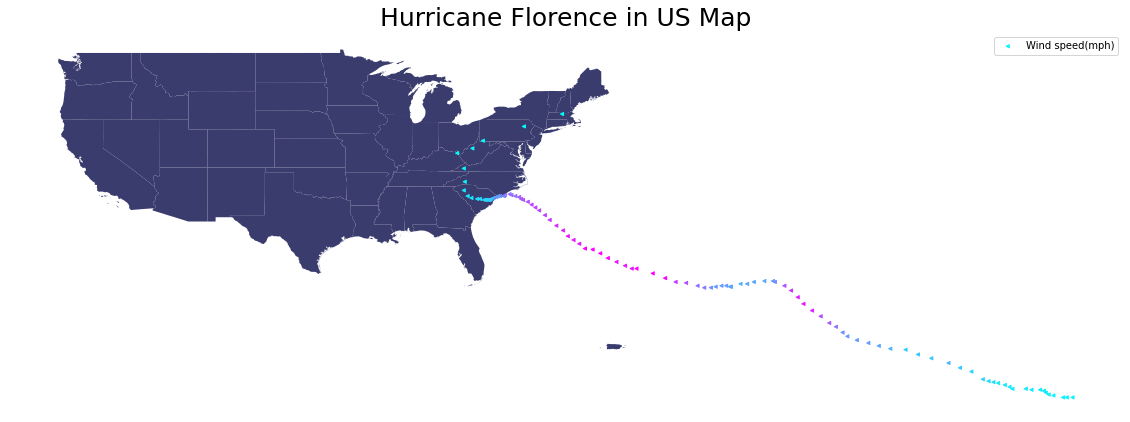

In [56]:
fig, ax = plt.subplots(1, figsize=(20,20))
base = country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(ax=ax, color='#3B3C6E')
florence.plot(ax=base, 
              column='Wind', 
              marker="<", 
              markersize=10,  
              cmap='cool', 
              #scheme='quantiles', 
              #legend=True,
              label="Wind speed(mph)", 
              #categorical=True,
              #legend_kwds=dict(loc='upper left', bbox_to_anchor=(1, 1)), 
              #ax=ax
             )
_ = ax.axis('off')
#handles, labels = ax.get_legend_handles_labels(); ax.legend(handles, labels)
plt.legend()
ax.set_title("Hurricane Florence in US Map", fontsize=25)
#plt.show()
plt.savefig('Hurricane_footage.png',bbox_inches='tight');
